In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df  = pd.read_csv("uber.csv") 

In [6]:
df.head() 
df.info()
df.columns
df = df.drop(['Unnamed: 0', 'key'], axis= 1) 
df.head() 
df.shape
df.dtypes
df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [24]:
df.isnull().sum()  
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True) 
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True) 
df.isnull().sum()  
df.dtypes 

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [26]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')  
df.dtypes 

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [28]:
df= df.assign(hour = df.pickup_datetime.dt.hour, 
             day= df.pickup_datetime.dt.day, 
             month = df.pickup_datetime.dt.month, 
             year = df.pickup_datetime.dt.year, 
             dayofweek = df.pickup_datetime.dt.dayofweek) 
df.head() 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [30]:
df = df.drop('pickup_datetime',axis=1) 
df.head() 
df.dtypes 

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int32
day                    int32
month                  int32
year                   int32
dayofweek              int32
dtype: object

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

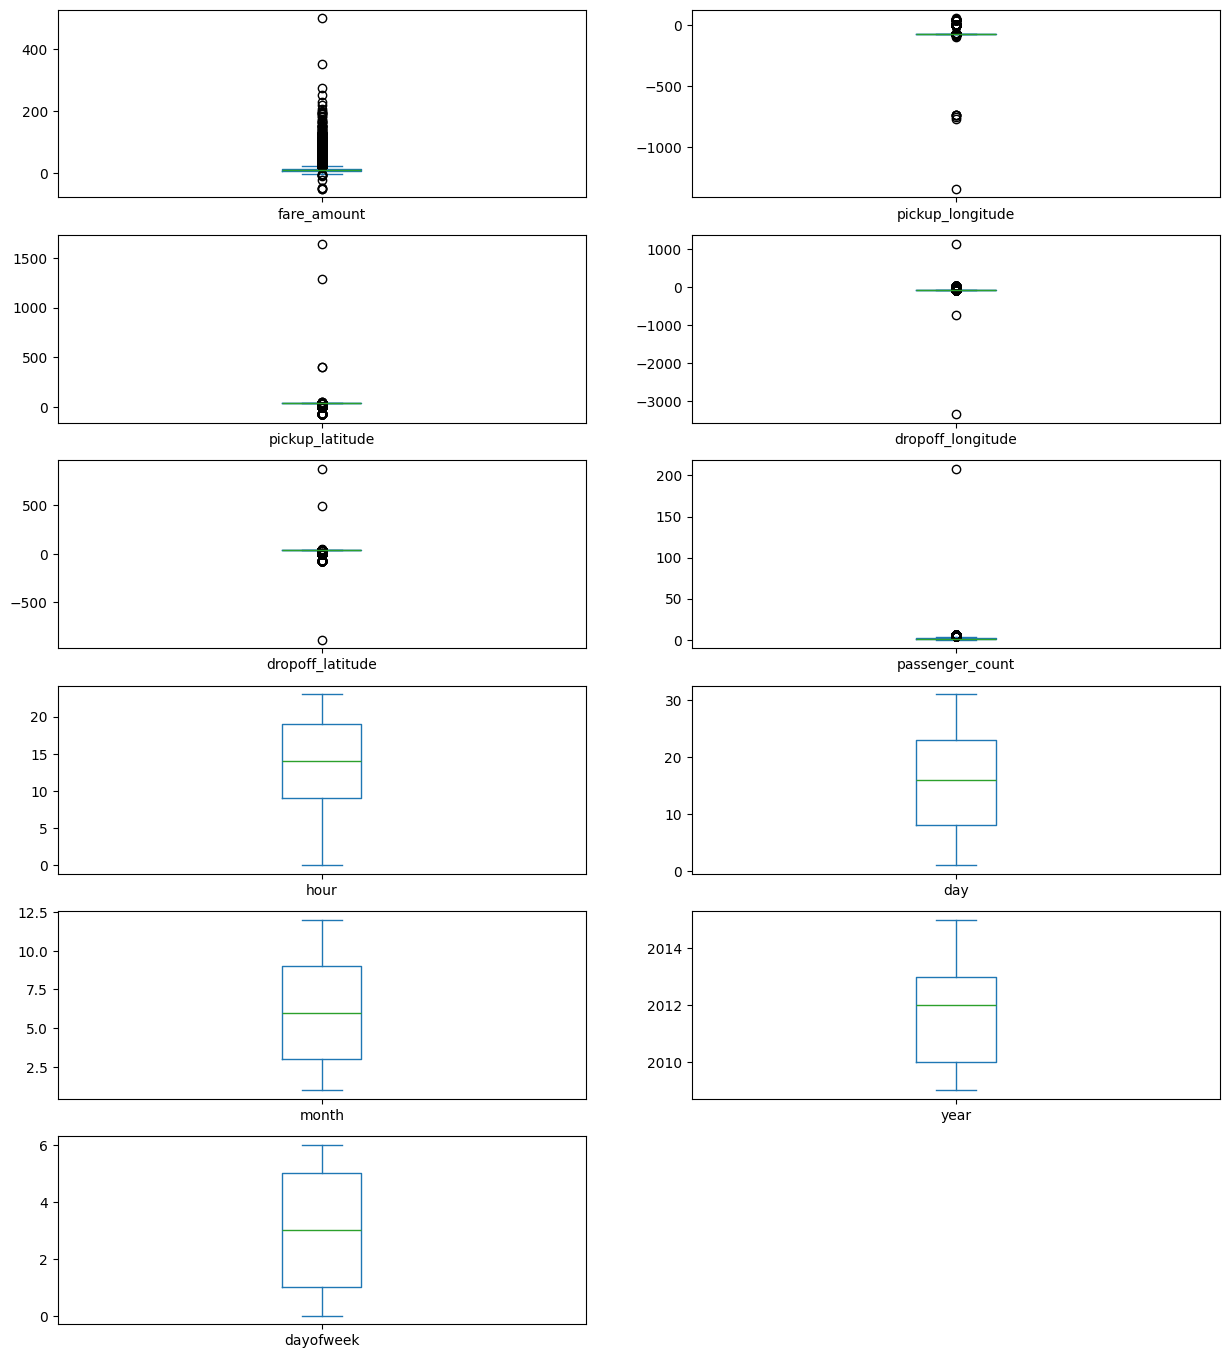

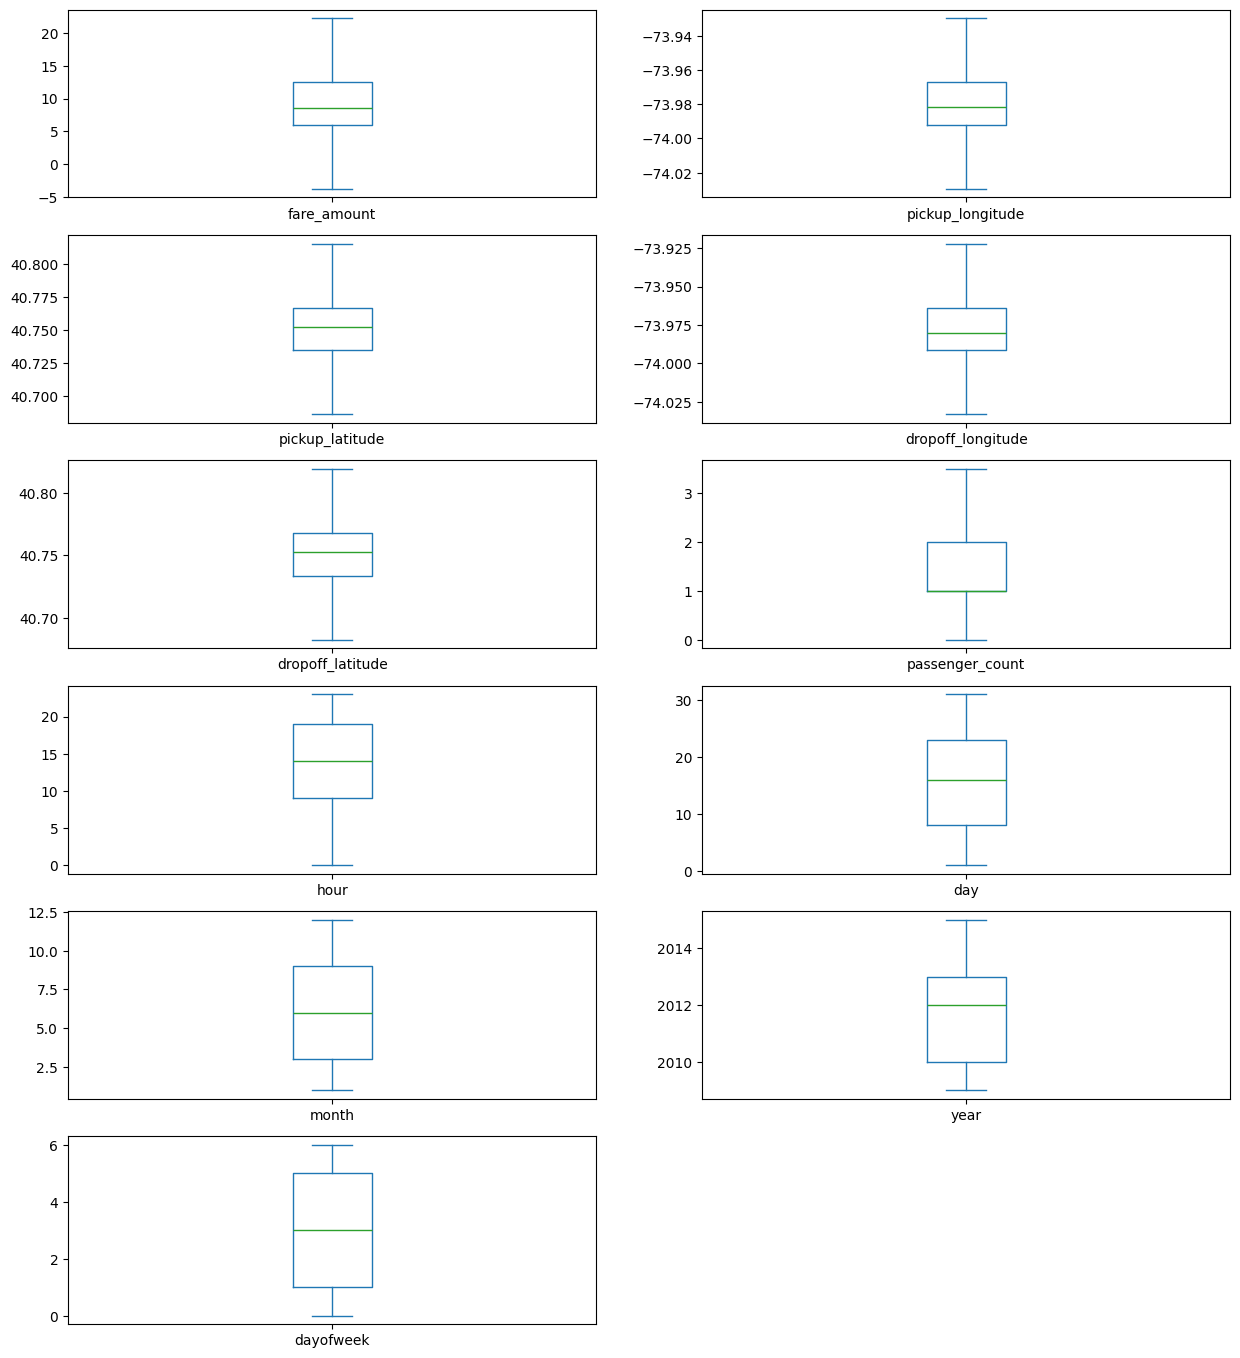

In [32]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
def remove_outlier(df1 , col): 
    Q1 = df1[col].quantile(0.25) 
    Q3 = df1[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_whisker = Q1-1.5*IQR 
    upper_whisker = Q3+1.5*IQR 
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker) 
    return df1 
 
def treat_outliers_all(df1 , col_list): 
    for c in col_list: 
        df1 = remove_outlier(df , c) 
    return df1 
df = treat_outliers_all(df , df.iloc[: , 0::]) 
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 

In [34]:
import haversine as hs
travel_dist = [] 
for pos in range(len(df['pickup_longitude'])): 
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]] 
        loc1=(lati1,long1) 
        loc2=(lati2,long2) 
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c) 
print(travel_dist) 
df['dist_travel_km'] = travel_dist 
df.head()

ModuleNotFoundError: No module named 'haversine'

In [ ]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)] 
print("Remaining observastions in the dataset:", df.shape)

<Axes: >

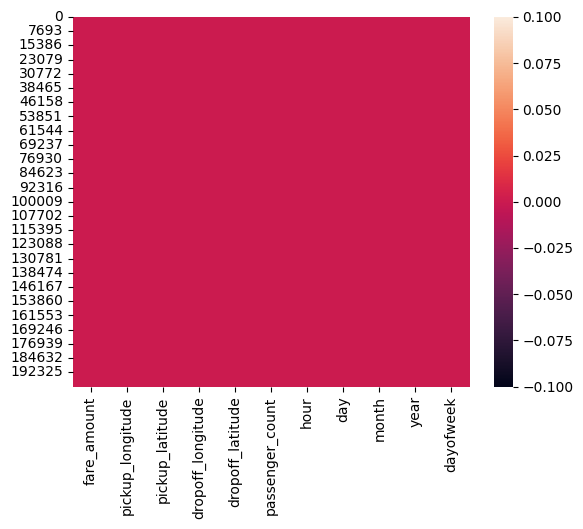

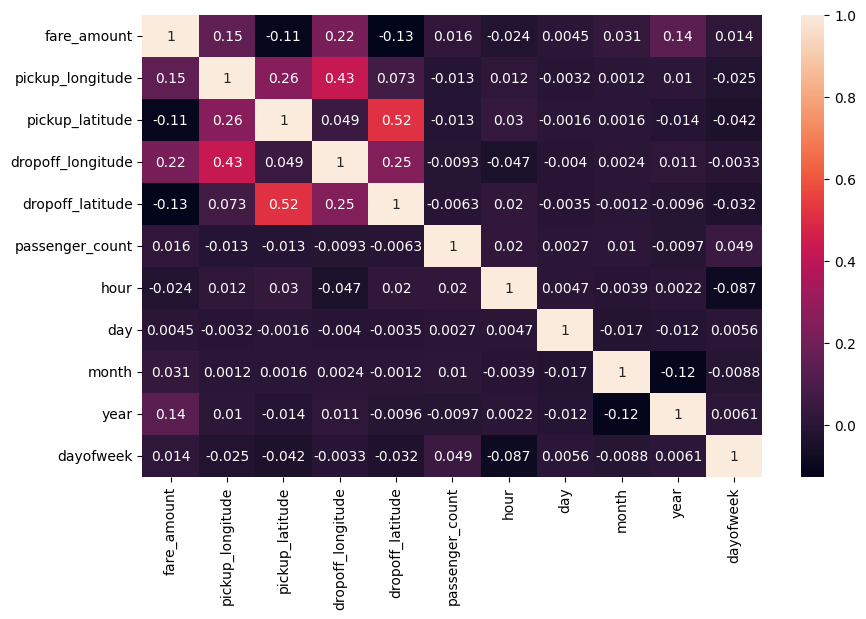

In [40]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) | 
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) | 
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) | 
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90) 
                                    ] 
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore') 
df.head() 
df.isnull().sum() 
sns.heatmap(df.isnull()) #Free for null values 
corr = df.corr() #Function to find the correlation 
corr 
fig,axis = plt.subplots(figsize = (10,6)) 
sns.heatmap(df.corr(),annot = True)

In [44]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek']] 
y = df['fare_amount'] 

In [46]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression() 
regression.fit(X_train,y_train) 
regression.coef_ 
regression.intercept_ 
prediction = regression.predict(X_test)
print(prediction) 
y_test

In [ ]:
from sklearn.metrics import r2_score  
r2_score(y_test,prediction) 
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,prediction) 
MSE  
RMSE = np.sqrt(MSE) 
RMSE 

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you 
want to build before making the prediction 
rf.fit(X_train,y_train) 
y_pred = rf.predict(X_test) 
y_pred 

In [ ]:
R2_Random = r2_score(y_test,y_pred) 
R2_Random 
MSE_Random = mean_squared_error(y_test,y_pred) 
MSE_Random 
RMSE_Random = np.sqrt(MSE_Random) 
RMSE_Random 